# 0. General Information

- *Author*: **Adrian Arroyo / AI Engineer**: https://www.linkedin.com/in/adrian-arroyo-p%C3%A9rez-85217967/
- *Data set*: https://www.kaggle.com/sveneschlbeck/formula-1-ergast-developer-api-data
- *Target*: Perform EDA and obtain useful and interesting insights about the available F1 data. Improve Pandas skills on the way.
- *License*: CC BY-NC-SA 4.0 (https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# Obtaining the data:

# %kaggle datasets download -d sveneschlbeck/formula-1-ergast-developer-api-data

# 1. Instalations, auxiliary functions and `imports`.

In [2]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# 2. Exploratory Data Analysis.

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/formula-1-ergast-developer-api-data/races.csv
/kaggle/input/formula-1-ergast-developer-api-data/constructor_results.csv
/kaggle/input/formula-1-ergast-developer-api-data/drivers.csv
/kaggle/input/formula-1-ergast-developer-api-data/constructors.csv
/kaggle/input/formula-1-ergast-developer-api-data/lap_times.csv
/kaggle/input/formula-1-ergast-developer-api-data/status.csv
/kaggle/input/formula-1-ergast-developer-api-data/driver_standings.csv
/kaggle/input/formula-1-ergast-developer-api-data/seasons.csv
/kaggle/input/formula-1-ergast-developer-api-data/pit_stops.csv
/kaggle/input/formula-1-ergast-developer-api-data/constructor_standings.csv
/kaggle/input/formula-1-ergast-developer-api-data/results.csv
/kaggle/input/formula-1-ergast-developer-api-data/circuits.csv
/kaggle/input/formula-1-ergast-developer-api-data/qualifying.csv


## 2.1 Asking analytical questions

1.   How will my analysis be used?
        * Junior developers will get insights on typical operations to data separated in several files, and how to relate the data.
        * F1 enthusiast will be able to get historic information about the F1 results, teams and pilots.
2.   Which statistical analysis techniques do I want to apply?
        * Simple pandas operations that imitate SQL operations to obtain information from different databases.
        * Simple historic visualizations and ordering will be performed to show how the data is evolving since its start.

## 2.1 Loading the tables into dataframes and checking their content

In [5]:
# dimensions
races_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/races.csv')
drivers_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/drivers.csv')
seasons_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/seasons.csv')
circuits_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/circuits.csv')
constructors_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/constructors.csv')

# facts
constructor_results_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/constructor_results.csv')
lap_times_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/lap_times.csv')
status_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/status.csv')
driver_standings_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/driver_standings.csv')
pit_stops_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/pit_stops.csv')
constructor_standings_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/constructor_standings.csv')
results_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/results.csv')
qualifying_df = pd.read_csv('/kaggle/input/formula-1-ergast-developer-api-data/qualifying.csv')

### Dimensions information

#### Races

In [6]:
races_df.info()
races_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1057 non-null   int64 
 1   year       1057 non-null   int64 
 2   round      1057 non-null   int64 
 3   circuitId  1057 non-null   int64 
 4   name       1057 non-null   object
 5   date       1057 non-null   object
 6   time       1057 non-null   object
 7   url        1057 non-null   object
dtypes: int64(4), object(4)
memory usage: 66.2+ KB


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


<AxesSubplot:title={'center':'Number of races per year'}, xlabel='year'>

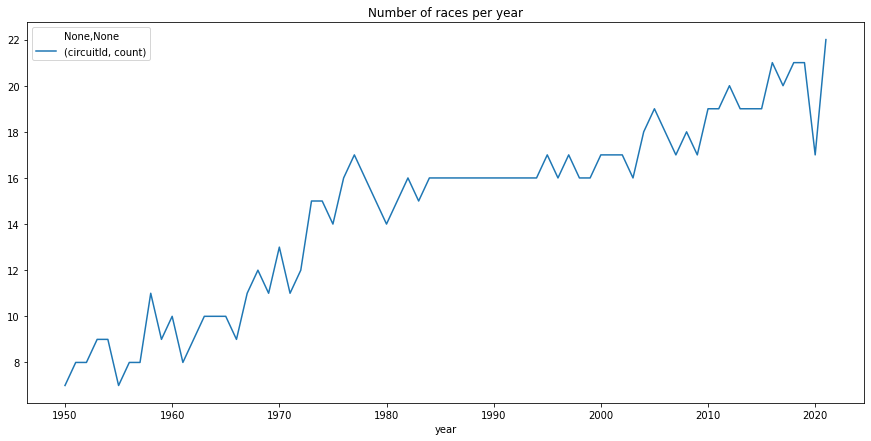

In [7]:
races_per_year = races_df.groupby(['year']).agg({'circuitId': ['count']})

races_per_year.plot(y=('circuitId', 'count'), figsize=(15,7), title='Number of races per year')

In [8]:
appearances_circuit_yearly = races_df.groupby(['name']).agg({'year': ['count']}).sort_values(('year', 'count'), ascending=False)
display(appearances_circuit_yearly)

,year
,count
name,
Italian Grand Prix,72
British Grand Prix,72
Monaco Grand Prix,67
Belgian Grand Prix,66
German Grand Prix,64
French Grand Prix,61
Spanish Grand Prix,51
Canadian Grand Prix,50


<AxesSubplot:title={'center':'Total appearances of each circuit from 1950 to 2021'}, xlabel='name'>

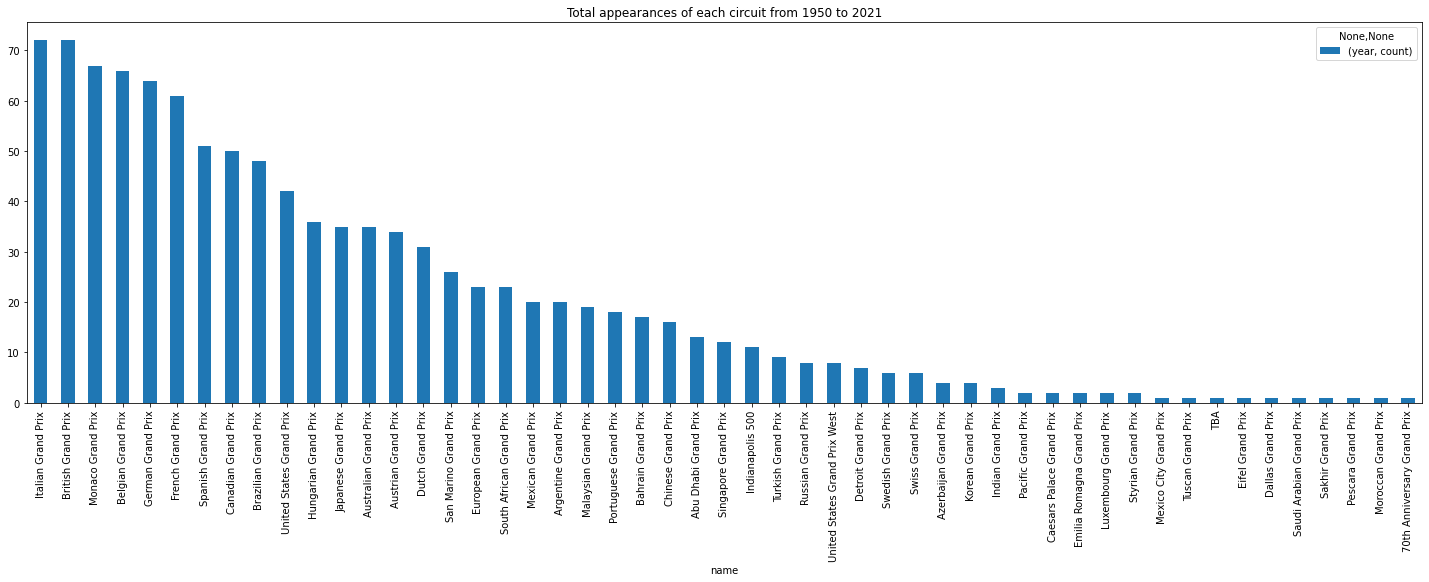

In [9]:
min_year = races_df.year.min()
max_year = races_df.year.max()
appearances_circuit_yearly.plot(y=('year', 'count'), figsize=(25,7), title='Total appearances of each circuit from {} to {}'.format(min_year, max_year), kind='bar')

#### Drivers

In [10]:
drivers_df.info()
drivers_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     853 non-null    int64 
 1   driverRef    853 non-null    object
 2   number       853 non-null    object
 3   code         853 non-null    object
 4   forename     853 non-null    object
 5   surname      853 non-null    object
 6   dob          853 non-null    object
 7   nationality  853 non-null    object
 8   url          853 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.1+ KB


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [11]:
drivers_nationality = drivers_df.groupby(['nationality']).agg({'code': ['count']}).sort_values(('code', 'count'), ascending=False)
display(drivers_nationality)

,code
,count
nationality,
British,165
American,157
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
Swiss,23


#### Seasons

In [12]:
seasons_df.info()
seasons_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    72 non-null     int64 
 1   url     72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


#### Circuits

In [13]:
circuits_df.info()
circuits_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [14]:
circuits_nationality = circuits_df.groupby(['country']).agg({'name': ['count']}).sort_values(('name', 'count'), ascending=False)
display(circuits_nationality)

,name
,count
country,
USA,11
France,7
Spain,6
Portugal,4
UK,4
Italy,4
Austria,3
Belgium,3


Interesting fact that there have been 11 different circuits in the USA while nowadays there is only one.

In [15]:
circuits_df[circuits_df['country']=='USA']

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
18,19,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA,39.7950,-86.2347,223,http://en.wikipedia.org/wiki/Indianapolis_Moto...
32,33,phoenix,Phoenix street circuit,Phoenix,USA,33.4479,-112.0750,345,http://en.wikipedia.org/wiki/Phoenix_street_ci...
36,37,detroit,Detroit Street Circuit,Detroit,USA,42.3298,-83.0401,177,http://en.wikipedia.org/wiki/Detroit_street_ci...
41,42,dallas,Fair Park,Dallas,USA,32.7774,-96.7587,139,http://en.wikipedia.org/wiki/Fair_Park
42,43,long_beach,Long Beach,California,USA,33.7651,-118.1890,12,"http://en.wikipedia.org/wiki/Long_Beach,_Calif..."
43,44,las_vegas,Las Vegas Street Circuit,Nevada,USA,36.1162,-115.1740,639,"http://en.wikipedia.org/wiki/Las_Vegas,_Nevada"
45,46,watkins_glen,Watkins Glen,New York State,USA,42.3369,-76.9272,485,http://en.wikipedia.org/wiki/Watkins_Glen_Inte...
59,60,riverside,Riverside International Raceway,California,USA,33.9370,-117.2730,470,http://en.wikipedia.org/wiki/Riverside_Interna...
62,63,sebring,Sebring International Raceway,Florida,USA,27.4547,-81.3483,18,http://en.wikipedia.org/wiki/Sebring_Raceway
68,69,americas,Circuit of the Americas,Austin,USA,30.1328,-97.6411,161,http://en.wikipedia.org/wiki/Circuit_of_the_Am...


Let's join this table with races table to see when those races happened.

,circuitId,circuitRef,name_x,location,country,lat,lng,alt,url_x,raceId,year,round,name_y,date,time,url_y
574,19,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA,39.7950,-86.2347,223,http://en.wikipedia.org/wiki/Indianapolis_Moto...,835,1950,3,Indianapolis 500,1950-05-30,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...
573,19,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA,39.7950,-86.2347,223,http://en.wikipedia.org/wiki/Indianapolis_Moto...,826,1951,2,Indianapolis 500,1951-05-30,\N,http://en.wikipedia.org/wiki/1951_Indianapolis...
572,19,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA,39.7950,-86.2347,223,http://en.wikipedia.org/wiki/Indianapolis_Moto...,818,1952,2,Indianapolis 500,1952-05-30,\N,http://en.wikipedia.org/wiki/1952_Indianapolis...
571,19,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA,39.7950,-86.2347,223,http://en.wikipedia.org/wiki/Indianapolis_Moto...,809,1953,2,Indianapolis 500,1953-05-30,\N,http://en.wikipedia.org/wiki/1953_Indianapolis...
570,19,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA,39.7950,-86.2347,223,http://en.wikipedia.org/wiki/Indianapolis_Moto...,800,1954,2,Indianapolis 500,1954-05-31,\N,http://en.wikipedia.org/wiki/1954_Indianapolis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,69,americas,Circuit of the Americas,Austin,USA,30.1328,-97.6411,161,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,965,2016,18,United States Grand Prix,2016-10-23,19:00:00,https://en.wikipedia.org/wiki/2016_United_Stat...
1026,69,americas,Circuit of the Americas,Austin,USA,30.1328,-97.6411,161,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,985,2017,17,United States Grand Prix,2017-10-22,19:00:00,https://en.wikipedia.org/wiki/2017_United_Stat...
1027,69,americas,Circuit of the Americas,Austin,USA,30.1328,-97.6411,161,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,1006,2018,18,United States Grand Prix,2018-10-21,18:10:00,https://en.wikipedia.org/wiki/2018_United_Stat...
1028,69,americas,Circuit of the Americas,Austin,USA,30.1328,-97.6411,161,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,1028,2019,19,United States Grand Prix,2019-11-03,19:10:00,https://en.wikipedia.org/wiki/2019_United_Stat...


<AxesSubplot:title={'center':'USA appearances of each circuit'}, xlabel='year'>

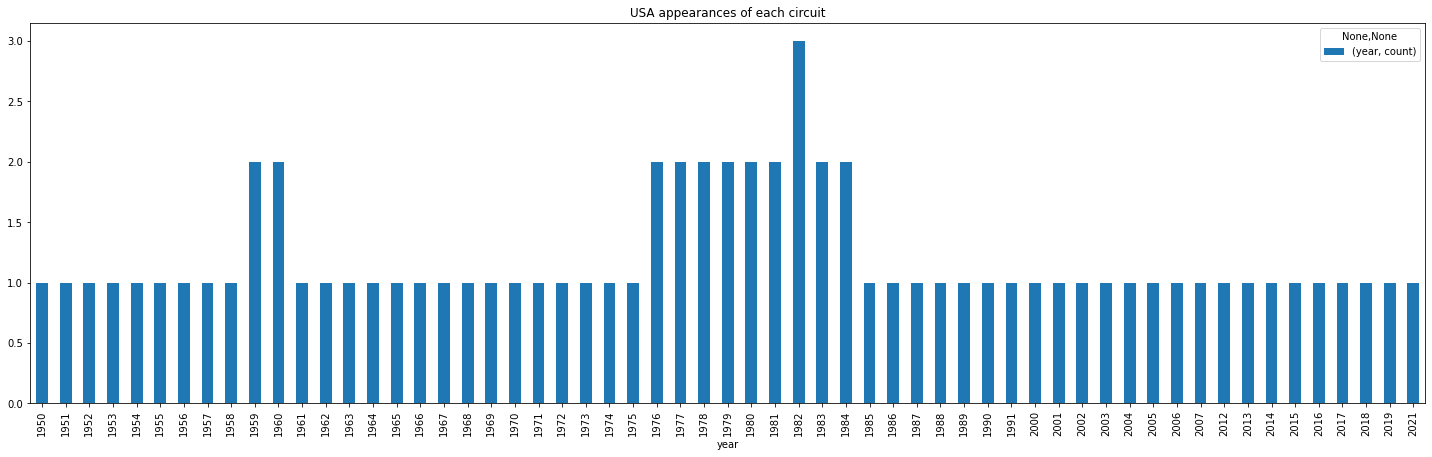

In [16]:
circuits_races = circuits_df.merge(races_df, on='circuitId', how='inner')

display(circuits_races[circuits_races['country']=='USA'].sort_values('year'))

circuits_races[circuits_races['country']=='USA'].groupby(['year']).agg({'year': ['count']}).\
                                                plot(y=('year', 'count'), figsize=(25,7), title='USA appearances of each circuit', kind='bar')

In [17]:
display(circuits_races.loc[(circuits_races['country']=='USA') & (circuits_races['year']==1982)])

,circuitId,circuitRef,name_x,location,country,lat,lng,alt,url_x,raceId,year,round,name_y,date,time,url_y
849,37,detroit,Detroit Street Circuit,Detroit,USA,42.3298,-83.0401,177,http://en.wikipedia.org/wiki/Detroit_street_ci...,473,1982,7,Detroit Grand Prix,1982-06-06,\N,http://en.wikipedia.org/wiki/1982_Detroit_Gran...
913,43,long_beach,Long Beach,California,USA,33.7651,-118.1890,12,"http://en.wikipedia.org/wiki/Long_Beach,_Calif...",469,1982,3,United States Grand Prix West,1982-04-04,\N,http://en.wikipedia.org/wiki/1982_United_State...
920,44,las_vegas,Las Vegas Street Circuit,Nevada,USA,36.1162,-115.1740,639,"http://en.wikipedia.org/wiki/Las_Vegas,_Nevada",482,1982,16,Caesars Palace Grand Prix,1982-09-25,\N,http://en.wikipedia.org/wiki/1982_Caesars_Pala...


Let's represent the different circuits in the world map

In [18]:
countries_gdp = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

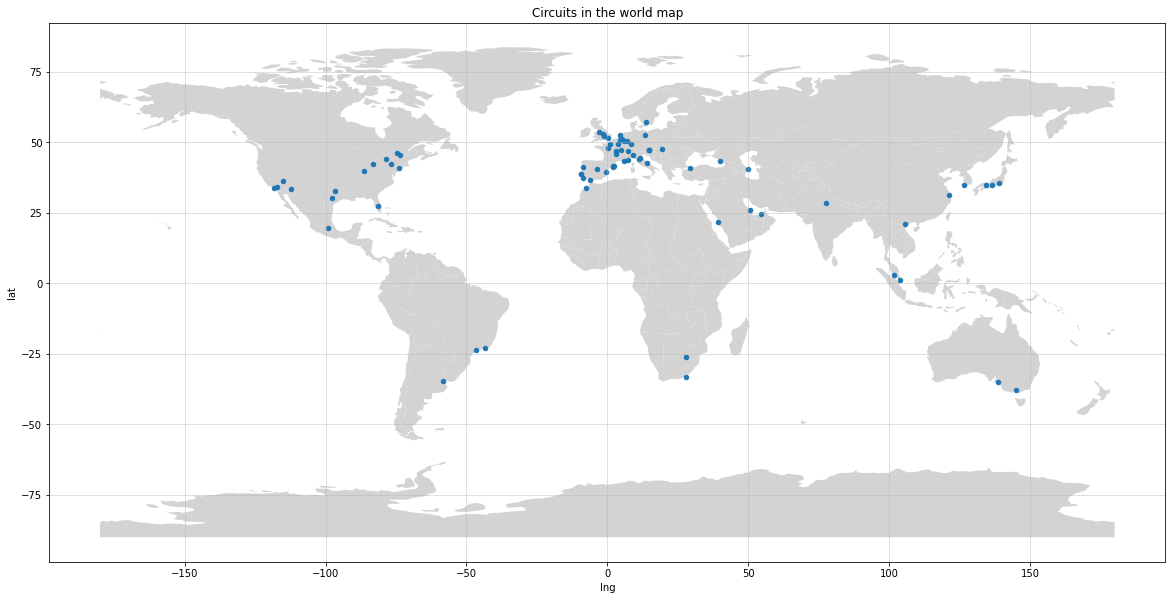

In [19]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

countries_gdp.plot(color="lightgrey",ax=ax)

# plot points
circuits_df.plot(x="lng", y="lat", kind="scatter", 
                colormap="YlOrRd", 
                title=f"Circuits in the world map", 
                ax=ax,
                figsize=(20,10))
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

#### Constructors

In [20]:
constructors_df.info()
constructors_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [21]:
display(constructors_df.groupby(['nationality']).agg({'name': ['count']}).sort_values(('name', 'count')))

,name
,count
nationality,
Hong Kong,1
New Zealand,1
Irish,1
Indian,1
Spanish,1
Rhodesian,1
Mexican,1
East German,1


<AxesSubplot:title={'center':'Constructors nationality total appearances'}, xlabel='nationality'>

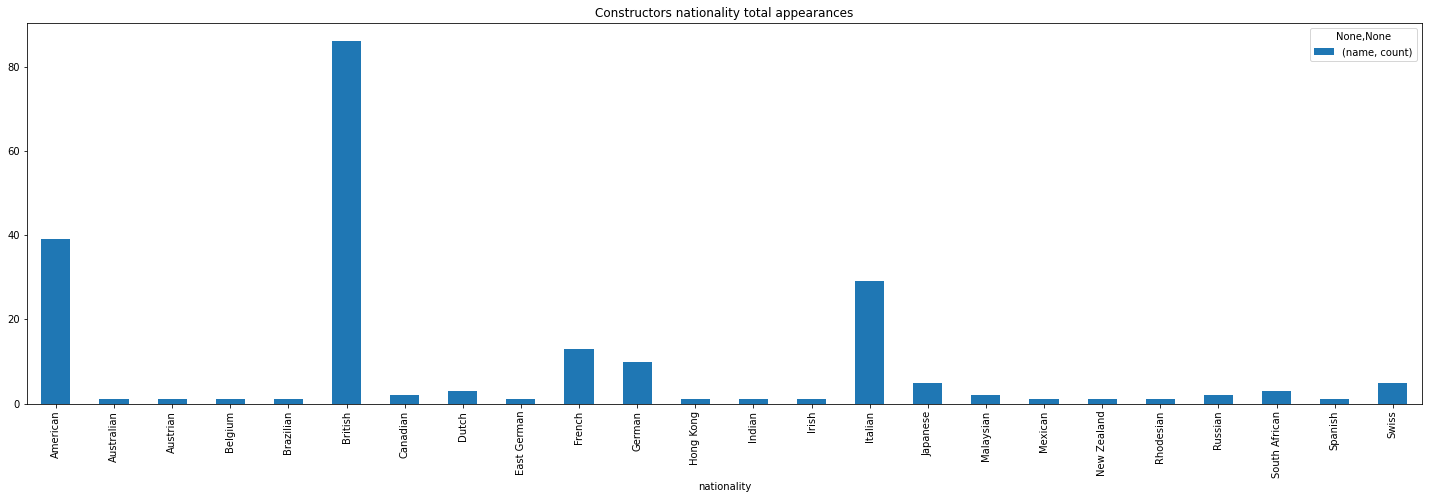

In [22]:
constructors_df.groupby(['nationality']).agg({'name': ['count']}).plot(y=('name', 'count'), figsize=(25,7), 
                                                                       title='Constructors nationality total appearances', kind='bar')

F1 has always been a very british sport and that's corroborated by the data. It is interesting to see American as the second nationality as nowadays is not common to have american drivers.

### Facts information

I used the term `facts` for tables that add information to two or more of the dimensions tables.

#### Results per race

This seems to be one of the most important tables, as it contains information about all the races that have happened and several `ids` that can be used to complete that information. We'll come back to this table in future cells.

In [23]:
results_df.info()
display(results_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25280 entries, 0 to 25279
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25280 non-null  int64  
 1   raceId           25280 non-null  int64  
 2   driverId         25280 non-null  int64  
 3   constructorId    25280 non-null  int64  
 4   number           25280 non-null  object 
 5   grid             25280 non-null  int64  
 6   position         25280 non-null  object 
 7   positionText     25280 non-null  object 
 8   positionOrder    25280 non-null  int64  
 9   points           25280 non-null  float64
 10  laps             25280 non-null  int64  
 11  time             25280 non-null  object 
 12  milliseconds     25280 non-null  object 
 13  fastestLap       25280 non-null  object 
 14  rank             25280 non-null  object 
 15  fastestLapTime   25280 non-null  object 
 16  fastestLapSpeed  25280 non-null  object 
 17  statusId    

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25275,25281,1067,4,214,14,5,16,16,16,0.0,57,\N,\N,55,14,1:33.252,206.073,11
25276,25282,1067,849,3,6,15,17,17,17,0.0,57,\N,\N,48,17,1:33.672,205.149,11
25277,25283,1067,20,117,5,10,18,18,18,0.0,57,\N,\N,54,7,1:32.730,207.233,11
25278,25284,1067,854,210,47,14,19,19,19,0.0,56,\N,\N,52,18,1:34.209,203.980,12


Let's investigate about the points given per year, as we know that F1 have had different points systems in history.

In [24]:
results_df[results_df['points'] == results_df['points'].max()]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
22514,22518,918,1,131,44,2,1,1,1,50.0,55,1:39:02.619,5942619,49,4,1:45.599,189.342,1


When was this 50 points race?
When did races with 0-25 points started? 

We need to join the results table with the races table to get this information. One simple way to do it is using `pd.DataFrame.merge` function.

In [25]:
results_races_df = results_df.merge(races_df, on='raceId')

Let's plot the maximum number of points per year.

<AxesSubplot:title={'center':'Maximum number of points per race and year'}, xlabel='year'>

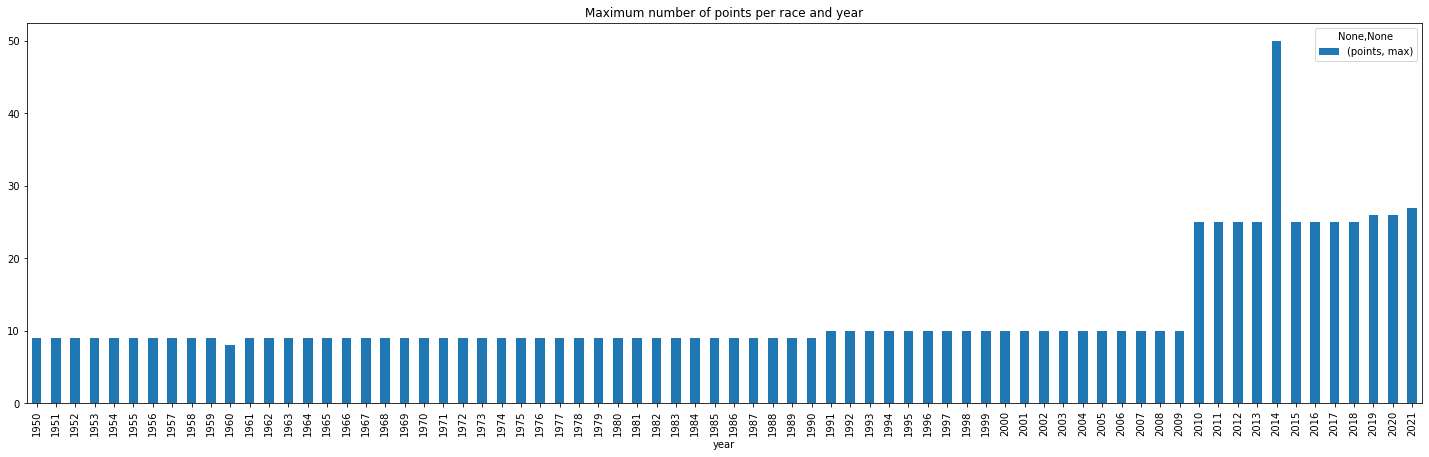

In [26]:
yearly_races_results_df = results_races_df.groupby('year').agg({'points': ['max']}).reset_index()

yearly_races_results_df.plot(x='year', y=('points', 'max'), figsize=(25,7), 
                             title='Maximum number of points per race and year', kind='bar')

In [27]:
display(results_races_df[results_races_df['points'] == 25].sort_values('year', ascending=True)['year'])

20323    2010
20755    2010
20731    2010
20707    2010
20683    2010
         ... 
25000    2021
24980    2021
24960    2021
25020    2021
25240    2021
Name: year, Length: 212, dtype: int64

In [28]:
display(results_races_df[results_races_df['points'] == 50].sort_values('year', ascending=True)['year'])

22520    2014
Name: year, dtype: int64

Except from 2014 (which is only 1 race, last race --> who could think this was a good idea?), it appears that there are three or four (depending on your view) different groups of points per races:

- Races from 1950 to 1990 gave points until 9 (except 1960 which was 8).
- Races from 1991 to 2009 gave points until 10.
- Races from 2010 to 2018 gave points until 25.
- Races from 2018 to 2021 gave points until 26 (25 points to winner and +1 point for fastest lap). This group could be considered same as 2010-2018 group because the +1 point is for fastest lap.

In [29]:
yearly_races_results_df[yearly_races_results_df['year'] == 1950]

,year,points
,,max
0,1950,9.0


In [30]:
yearly_races_results_df[yearly_races_results_df['year'] == 1960]

,year,points
,,max
10,1960,8.0


It is interesting to see that, according to the data, only in 1960 there were given 8 points to winner. However, taking a quick look over the internet in websites like:

- https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems
- https://www.racefans.net/2009/12/22/think-the-new-f1-points-system-is-weird-weve-seen-much-stranger-than-that/
- https://f1.fandom.com/wiki/Points

They explain that, actually, from 1950 to 1960 winners could get only 8 points (following a 1-8, 2-6, 3-4, 4-3, 5-2 points per position), BUT drivers were given +1 point for fastest lap, so winners could get 9 points. 

In 1960 this fastest lap point was removed and from 1961 the point schema changed to: 1-9, 2-6, 3-4, 4-3, 5-2 points per position, and NO fastest lap point was given.


Considering this, let's update our groups (only theoretically at this point):

- Races from 1950 to 1960 gave points until 8 and +1 point for fastest lap so winners could get until 9 (except for 1960). 
- Races from 1960 to 1990 gave points until 9 and there were no fastest lap point.
- Races from 1991 to 2009 gave points until 10.
- Races from 2010 to 2021 gave points until 25 and, from 2019, +1 point for fastest lap. An exception is 2014 which gave 50 points the last race (still wtf?).

#### Constructor results data

In [31]:
constructor_results_df.info()

display(constructor_results_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11890 entries, 0 to 11889
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11890 non-null  int64  
 1   raceId                11890 non-null  int64  
 2   constructorId         11890 non-null  int64  
 3   points                11890 non-null  float64
 4   status                11890 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 464.6+ KB


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
11885,16385,1067,117,2.0,\N
11886,16386,1067,214,1.0,\N
11887,16387,1067,51,0.0,\N
11888,16388,1067,3,0.0,\N


Again, this table seems not usefull enough as it contains ids and points data, we should merge it with the constructors dimension and the races table

In [32]:
full_constructor_results_df = constructor_results_df.merge(constructors_df, on='constructorId', how='inner')

display(full_constructor_results_df)

,constructorResultsId,raceId,constructorId,points,status,constructorRef,name,nationality,url
0,1,18,1,14.0,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,14,19,1,10.0,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,25,20,1,4.0,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,35,21,1,6.0,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,46,22,1,8.0,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...
11885,16346,1063,214,3.0,\N,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team
11886,16354,1064,214,10.0,\N,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team
11887,16365,1065,214,5.0,\N,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team
11888,16374,1066,214,8.0,\N,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


Notice that some fields have the same name, we can use the parameter `suffixes` in `pd.DataFrame.merge` function to add a more descriptive name (default is (“_x”, “_y”)).

In [33]:
full_constructor_results_races_df = full_constructor_results_df\
                                    .merge(races_df, on='raceId', how='inner', suffixes=('_constructor', '_race'))

display(full_constructor_results_races_df)

,constructorResultsId,raceId,constructorId,points,status,constructorRef,name_constructor,nationality,url_constructor,year,round,circuitId,name_race,date,time,url_race
0,1,18,1,14.0,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,2,18,2,8.0,\N,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,3,18,3,9.0,\N,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,4,18,4,5.0,\N,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,5,18,5,2.0,\N,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11885,10014,748,108,4.0,\N,epperly,Epperly,American,http://en.wikipedia.org/wiki/Epperly,1960,3,19,Indianapolis 500,1960-05-30,\N,http://en.wikipedia.org/wiki/1960_Indianapolis...
11886,10016,748,110,2.0,\N,lesovsky,Lesovsky,American,http://en.wikipedia.org/wiki/Lesovsky,1960,3,19,Indianapolis 500,1960-05-30,\N,http://en.wikipedia.org/wiki/1960_Indianapolis...
11887,10018,748,112,0.0,\N,meskowski,Meskowski,American,http://en.wikipedia.org/wiki/Meskowski,1960,3,19,Indianapolis 500,1960-05-30,\N,http://en.wikipedia.org/wiki/1960_Indianapolis...
11888,10017,748,111,1.0,\N,trevis,Trevis,American,http://en.wikipedia.org/wiki/Trevis,1960,3,19,Indianapolis 500,1960-05-30,\N,http://en.wikipedia.org/wiki/1960_Indianapolis...


Let's see the total points of each constructor over the years.

<AxesSubplot:title={'center':'Total points in history for each constructor'}, ylabel='name_constructor'>

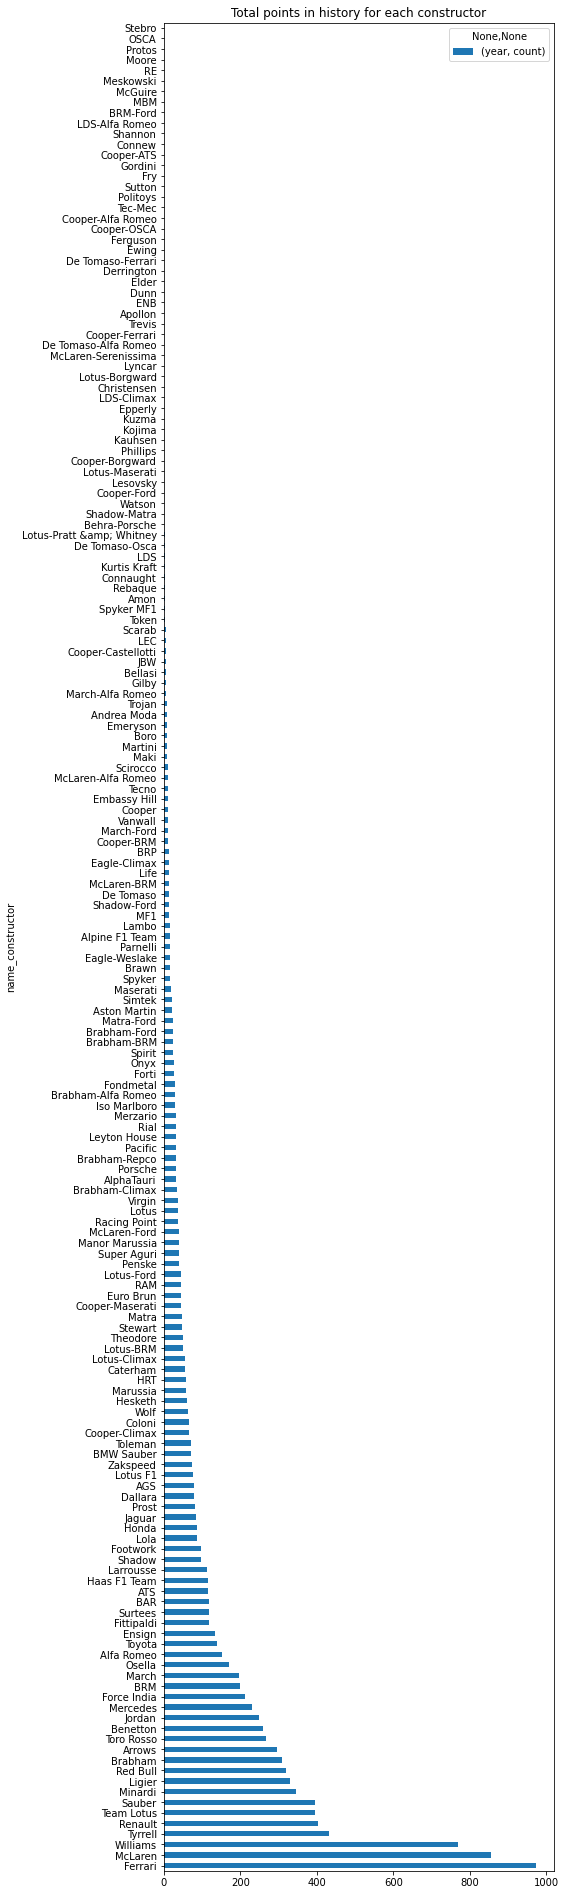

In [34]:
full_constructor_results_races_df.groupby(['name_constructor']).agg({'year': ['count']})\
                                 .sort_values(('year', 'count'), ascending=False)\
                                 .plot.barh(y=('year', 'count'), figsize=(7,34), 
                                            title='Total points in history for each constructor')

Let's try to divide this data per year and constructor. We can pass a `list` to the `groupby` function in pandas with several column names.

In [35]:
full_constructor_results_races_df.groupby(['year', 'name_constructor']).agg({'points': ['sum']})

points
                         sum
year name_constructor       
1956 Ferrari            21.0
     Gordini             0.0
     Maserati           28.0
1958 BRM                20.0
     Connaught           0.0
...                      ...
2021 Haas F1 Team        0.0
     McLaren           240.0
     Mercedes          433.5
     Red Bull          397.5
     Williams           23.0

[919 rows x 1 columns]

With this kind of aggregation, we can get yearly information. Let's complete it with another index for the race name and for the round (basically an identifier for the GP order).

In [36]:
aggregated_full_constructor_results_races_df = full_constructor_results_races_df\
                                                .groupby(['year', 'name_constructor', 'name_race', 'round'])\
                                                .agg({'points': ['sum']})
display(aggregated_full_constructor_results_races_df)

points
                                                     sum
year name_constructor name_race             round       
1956 Ferrari          Argentine Grand Prix  1       12.0
                      German Grand Prix     7        9.0
     Gordini          German Grand Prix     7        0.0
     Maserati         Argentine Grand Prix  1       13.0
                      German Grand Prix     7       15.0
...                                                  ...
2021 Williams         Portuguese Grand Prix 3        0.0
                      Russian Grand Prix    15       1.0
                      Spanish Grand Prix    4        0.0
                      Styrian Grand Prix    8        0.0
                      Turkish Grand Prix    16       0.0

[11890 rows x 1 columns]

We can then separate easily each season points per team and race and see their performance over the season. For example, let's use Ferrari.

In [37]:
aggregated_full_constructor_results_races_df.loc[(2021, 'Ferrari')].sort_values('round')

,,points
,,sum
name_race,round,
Bahrain Grand Prix,1,12.0
Emilia Romagna Grand Prix,2,22.0
Portuguese Grand Prix,3,8.0
Spanish Grand Prix,4,18.0
Monaco Grand Prix,5,18.0
Azerbaijan Grand Prix,6,16.0
French Grand Prix,7,0.0
Styrian Grand Prix,8,14.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='name_race,round'>

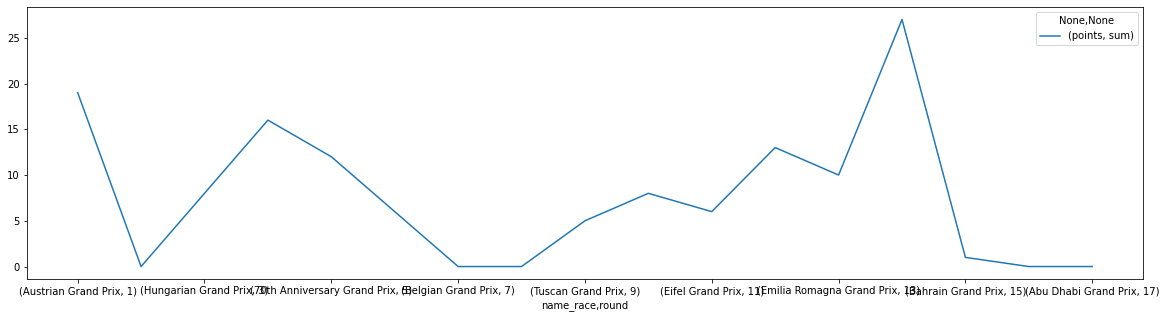

In [38]:
aggregated_full_constructor_results_races_df.sort_values('round').loc[(2020, 'Ferrari')].plot(figsize=(20,5))


Let's compare their performance againts the championship winners: Mercedes.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='name_race,round'>

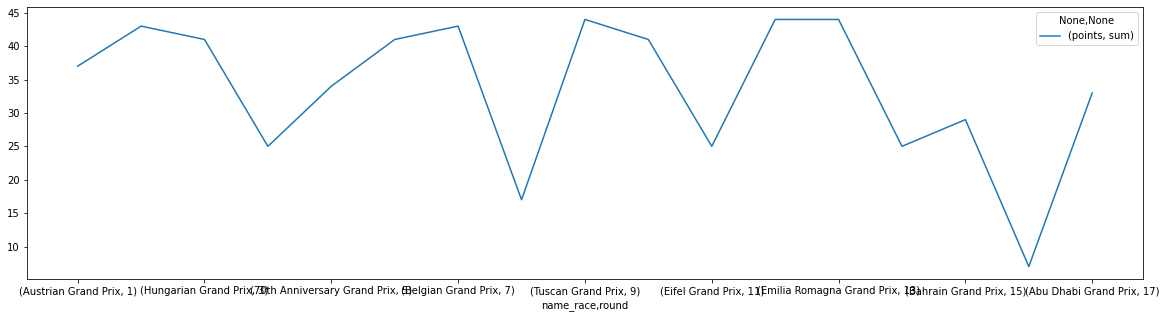

In [39]:
aggregated_full_constructor_results_races_df.sort_values('round').loc[(2020, 'Mercedes')].plot(figsize=(20,5))

#### Lap Times

In [40]:
lap_times_df.info()

display(lap_times_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507978 entries, 0 to 507977
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        507978 non-null  int64 
 1   driverId      507978 non-null  int64 
 2   lap           507978 non-null  int64 
 3   position      507978 non-null  int64 
 4   time          507978 non-null  object
 5   milliseconds  507978 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.3+ MB


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
507973,1067,849,53,17,1:34.091,94091
507974,1067,849,54,17,1:34.824,94824
507975,1067,849,55,17,1:36.417,96417
507976,1067,849,56,17,1:34.505,94505


Merging this table with races table, provides us with the lap time of each driver in each lap of each race per season (lots of data :D)

In [41]:
print(len(lap_times_df), len(races_df))

lap_times_races_df = lap_times_df.merge(races_df, on='raceId', how='inner', suffixes=('_lap_times', '_race'))

display(lap_times_races_df)

507978 1057


,raceId,driverId,lap,position,time_lap_times,milliseconds,year,round,circuitId,name,date,time_race,url
0,841,20,1,1,1:38.109,98109,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
1,841,20,2,1,1:33.006,93006,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
2,841,20,3,1,1:32.713,92713,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
3,841,20,4,1,1:32.803,92803,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
4,841,20,5,1,1:32.342,92342,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507973,1067,849,53,17,1:34.091,94091,2021,16,5,Turkish Grand Prix,2021-10-10,12:00:00,http://en.wikipedia.org/wiki/2021_Turkish_Gran...
507974,1067,849,54,17,1:34.824,94824,2021,16,5,Turkish Grand Prix,2021-10-10,12:00:00,http://en.wikipedia.org/wiki/2021_Turkish_Gran...
507975,1067,849,55,17,1:36.417,96417,2021,16,5,Turkish Grand Prix,2021-10-10,12:00:00,http://en.wikipedia.org/wiki/2021_Turkish_Gran...
507976,1067,849,56,17,1:34.505,94505,2021,16,5,Turkish Grand Prix,2021-10-10,12:00:00,http://en.wikipedia.org/wiki/2021_Turkish_Gran...


In [42]:
lap_times_races_df.groupby(['raceId', 'driverId']).agg({'milliseconds': ['min', 'max']})

milliseconds        
                         min     max
raceId driverId                     
1      1               89020  153309
       2               88283  157754
       3               87706  155699
       4               88712  153045
       6               89923  104899
...                      ...     ...
1067   847             93399  114322
       849             93672  116674
       852             92844  115897
       853             95438  116480
       854             94209  116454

[9600 rows x 2 columns]

Fastest lap recorded

In [43]:
lap_times_races_df[lap_times_races_df['milliseconds'] == lap_times_races_df['milliseconds'].min()]

,raceId,driverId,lap,position,time_lap_times,milliseconds,year,round,circuitId,name,date,time_race,url
488409,1046,847,80,14,0:55.404,55404,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


Let's get the whole context. Using `to_dict` allows us to print the information vertically (because it is just a single row).

> Notice that we are doing first a left join, and then another left join but with the `merge` function. This is because using the `merge` function is more flexible and allows us to select which column of the left and which of the right are the ones that should be considered for joining. Using `join` may return undesired results because it considers the indexes of the dataframes for the join operation. (Try it and correct me if i am wrong!)

In [44]:
results_df[(results_df['raceId'] == 1046) & (results_df['driverId'] == 847)]\
                        .join(races_df, on='raceId', how='left', rsuffix='races')\
                        .merge(circuits_df, left_on='circuitId', right_on='circuitId', how='left', suffixes=('_races','_circuit')).to_dict()

{'resultId': {0: 24934},
 'raceId': {0: 1046},
 'driverId': {0: 847},
 'constructorId': {0: 131},
 'number': {0: '63'},
 'grid': {0: 2},
 'position': {0: '9'},
 'positionText': {0: '9'},
 'positionOrder': {0: 9},
 'points': {0: 3.0},
 'laps': {0: 87},
 'time': {0: '+18.556'},
 'milliseconds': {0: '5493670'},
 'fastestLap': {0: '80'},
 'rank': {0: '1'},
 'fastestLapTime': {0: '0:55.404'},
 'fastestLapSpeed': {0: '230.214'},
 'statusId': {0: 1},
 'raceIdraces': {0: 1062},
 'year': {0: 2021},
 'round': {0: 11},
 'circuitId': {0: 11},
 'name_races': {0: 'Hungarian Grand Prix'},
 'date': {0: '2021-08-01'},
 'timeraces': {0: '13:00:00'},
 'url_races': {0: 'http://en.wikipedia.org/wiki/2021_Hungarian_Grand_Prix'},
 'circuitRef': {0: 'hungaroring'},
 'name_circuit': {0: 'Hungaroring'},
 'location': {0: 'Budapest'},
 'country': {0: 'Hungary'},
 'lat': {0: 47.5789},
 'lng': {0: 19.2486},
 'alt': {0: 264},
 'url_circuit': {0: 'http://en.wikipedia.org/wiki/Hungaroring'}}

In [45]:
a = results_df.join(lap_times_races_df, on='raceId', how='inner', rsuffix=('_lap_times'))
a[(a['raceId'] == 1046) & (a['driverId'] == 847)].to_dict()

{'resultId': {24928: 24934},
 'raceId': {24928: 1046},
 'driverId': {24928: 847},
 'constructorId': {24928: 131},
 'number': {24928: '63'},
 'grid': {24928: 2},
 'position': {24928: '9'},
 'positionText': {24928: '9'},
 'positionOrder': {24928: 9},
 'points': {24928: 3.0},
 'laps': {24928: 87},
 'time': {24928: '+18.556'},
 'milliseconds': {24928: '5493670'},
 'fastestLap': {24928: '80'},
 'rank': {24928: '1'},
 'fastestLapTime': {24928: '0:55.404'},
 'fastestLapSpeed': {24928: '230.214'},
 'statusId': {24928: 1},
 'raceId_lap_times': {24928: 841},
 'driverId_lap_times': {24928: 153},
 'lap': {24928: 40},
 'position_lap_times': {24928: 14},
 'time_lap_times': {24928: '1:30.687'},
 'milliseconds_lap_times': {24928: 90687},
 'year': {24928: 2011},
 'round': {24928: 1},
 'circuitId': {24928: 1},
 'name': {24928: 'Australian Grand Prix'},
 'date': {24928: '2011-03-27'},
 'time_race': {24928: '06:00:00'},
 'url': {24928: 'http://en.wikipedia.org/wiki/2011_Australian_Grand_Prix'}}

Slowest lap recorded

In [46]:
lap_times_races_df[lap_times_races_df['milliseconds'] == lap_times_races_df['milliseconds'].max()]

,raceId,driverId,lap,position,time_lap_times,milliseconds,year,round,circuitId,name,date,time_race,url
8372,847,2,25,4,2:05:07.547,7507547,2011,7,7,Canadian Grand Prix,2011-06-12,17:00:00,http://en.wikipedia.org/wiki/2011_Canadian_Gra...


In [47]:
results_df[(results_df['raceId'] == 847) & (results_df['driverId'] == 2)]\
                        .join(races_df, on='raceId', how='left', rsuffix='races')\
                        .merge(circuits_df, left_on='circuitId', right_on='circuitId', how='left', suffixes=('_races','_circuit')).to_dict()

{'resultId': {0: 20939},
 'raceId': {0: 847},
 'driverId': {0: 2},
 'constructorId': {0: 4},
 'number': {0: '9'},
 'grid': {0: 9},
 'position': {0: '\\N'},
 'positionText': {0: 'R'},
 'positionOrder': {0: 20},
 'points': {0: 0.0},
 'laps': {0: 55},
 'time': {0: '\\N'},
 'milliseconds': {0: '\\N'},
 'fastestLap': {0: '55'},
 'rank': {0: '20'},
 'fastestLapTime': {0: '1:25.135'},
 'fastestLapSpeed': {0: '184.408'},
 'statusId': {0: 3},
 'raceIdraces': {0: 849},
 'year': {0: 2011},
 'round': {0: 9},
 'circuitId': {0: 9},
 'name_races': {0: 'British Grand Prix'},
 'date': {0: '2011-07-10'},
 'timeraces': {0: '12:00:00'},
 'url_races': {0: 'http://en.wikipedia.org/wiki/2011_British_Grand_Prix'},
 'circuitRef': {0: 'silverstone'},
 'name_circuit': {0: 'Silverstone Circuit'},
 'location': {0: 'Silverstone'},
 'country': {0: 'UK'},
 'lat': {0: 52.0786},
 'lng': {0: -1.01694},
 'alt': {0: 153},
 'url_circuit': {0: 'http://en.wikipedia.org/wiki/Silverstone_Circuit'}}

Status Data

In [48]:
status_df.info()
display(status_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


Looks like this dataframe represents how the drivers finished each race by means of a category or type.

In [49]:
status_df['status'].unique()

array(['Finished', 'Disqualified', 'Accident', 'Collision', 'Engine',
       'Gearbox', 'Transmission', 'Clutch', 'Hydraulics', 'Electrical',
       '+1 Lap', '+2 Laps', '+3 Laps', '+4 Laps', '+5 Laps', '+6 Laps',
       '+7 Laps', '+8 Laps', '+9 Laps', 'Spun off', 'Radiator',
       'Suspension', 'Brakes', 'Differential', 'Overheating',
       'Mechanical', 'Tyre', 'Driver Seat', 'Puncture', 'Driveshaft',
       'Retired', 'Fuel pressure', 'Front wing', 'Water pressure',
       'Refuelling', 'Wheel', 'Throttle', 'Steering', 'Technical',
       'Electronics', 'Broken wing', 'Heat shield fire', 'Exhaust',
       'Oil leak', '+11 Laps', 'Wheel rim', 'Water leak', 'Fuel pump',
       'Track rod', '+17 Laps', 'Oil pressure', '+42 Laps', '+13 Laps',
       'Withdrew', '+12 Laps', 'Engine fire', 'Engine misfire',
       '+26 Laps', 'Tyre puncture', 'Out of fuel', 'Wheel nut',
       'Not classified', 'Pneumatics', 'Handling', 'Rear wing', 'Fire',
       'Wheel bearing', 'Physical', 'Fuel sys

#### Pit stops data

In [50]:
pit_stops_df.info()
display(pit_stops_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8577 non-null   int64 
 1   driverId      8577 non-null   int64 
 2   stop          8577 non-null   int64 
 3   lap           8577 non-null   int64 
 4   time          8577 non-null   object
 5   duration      8577 non-null   object
 6   milliseconds  8577 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 469.2+ KB


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8572,1067,840,1,39,16:05:17,35.509,35509
8573,1067,854,1,39,16:07:05,23.892,23892
8574,1067,841,1,40,16:07:22,23.150,23150
8575,1067,844,1,47,16:17:27,23.646,23646


Fastest vs slowest pit stops

In [51]:
pit_stops_df[pit_stops_df['milliseconds'] == pit_stops_df['milliseconds'].min()]

,raceId,driverId,stop,lap,time,duration,milliseconds
1037,858,813,2,30,17:58:49,12.897,12897


In [52]:
pit_stops_df[pit_stops_df['milliseconds'] == pit_stops_df['milliseconds'].max()]

,raceId,driverId,stop,lap,time,duration,milliseconds
8390,1061,849,1,2,15:08:32,34:37.164,2077164


In [53]:
races_df[races_df['raceId'] == 1061]

,raceId,year,round,circuitId,name,date,time,url
1045,1061,2021,10,9,British Grand Prix,2021-07-18,14:00:00,http://en.wikipedia.org/wiki/2021_British_Gran...


#### Qualifying data

In [54]:
qualifying_df.info()
display(qualifying_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9015 non-null   int64 
 1   raceId         9015 non-null   int64 
 2   driverId       9015 non-null   int64 
 3   constructorId  9015 non-null   int64 
 4   number         9015 non-null   int64 
 5   position       9015 non-null   int64 
 6   q1             9007 non-null   object
 7   q2             8881 non-null   object
 8   q3             8760 non-null   object
dtypes: int64(6), object(3)
memory usage: 634.0+ KB


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9010,9051,1067,817,1,3,16,1:25.881,\N,\N
9011,9052,1067,849,3,6,17,1:26.086,\N,\N
9012,9053,1067,841,51,99,18,1:26.430,\N,\N
9013,9054,1067,8,51,7,19,1:27.525,\N,\N


Fastest vs lowest qualifying laps

In [55]:
# qualifying_df[qualifying_df['']]

#### Driver standings

In [56]:
driver_standings_df.info()
display(driver_standings_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33269 entries, 0 to 33268
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33269 non-null  int64  
 1   raceId             33269 non-null  int64  
 2   driverId           33269 non-null  int64  
 3   points             33269 non-null  float64
 4   position           33269 non-null  int64  
 5   positionText       33269 non-null  object 
 6   wins               33269 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33264,70630,1067,842,74.0,9,9,0
33265,70631,1067,849,7.0,16,16,0
33266,70632,1067,4,58.0,10,10,0
33267,70633,1067,853,0.0,21,21,0


Sorting per race and per position on the finish line on that race.

In [57]:
driver_standings_df.set_index('driverStandingsId').groupby(['raceId', 'driverId']).max().sort_values(['raceId', 'position'])

points  position positionText  wins
raceId driverId                                     
1      18          10.0         1            1     1
       22           8.0         2            2     0
       15           6.0         3            3     0
       10           5.0         4            4     0
       4            4.0         5            5     0
...                 ...       ...          ...   ...
1067   8            6.0        17           17     0
       841          1.0        18           18     0
       854          0.0        19           19     0
       9            0.0        20           20     0
       853          0.0        21           21     0

[33268 rows x 4 columns]

#### Constructor standings

In [58]:
constructor_standings_df.info()
display(constructor_standings_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12656 non-null  int64  
 1   raceId                  12656 non-null  int64  
 2   constructorId           12656 non-null  int64  
 3   points                  12656 non-null  float64
 4   position                12656 non-null  int64  
 5   positionText            12656 non-null  object 
 6   wins                    12656 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 692.2+ KB


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12651,27868,1067,117,61.0,7,7,0
12652,27869,1067,51,7.0,9,9,0
12653,27870,1067,214,104.0,5,5,1
12654,27871,1067,3,23.0,8,8,0


Sorting per race and total points earned in desdending order.

In [59]:
constructor_standings_df.set_index('constructorStandingsId').groupby(['raceId', 'constructorId']).max().sort_values(['raceId', 'points'], ascending=False)

points  position positionText  wins
raceId constructorId                                     
1067   131             433.5         1            1     6
       9               397.5         2            2     8
       1               240.0         3            3     1
       6               232.5         4            4     0
       214             104.0         5            5     1
...                      ...       ...          ...   ...
1      5                 3.0         5            5     0
       2                 0.0         7            7     0
       6                 0.0         9            9     0
       9                 0.0         8            8     0
       10                0.0         6            6     0

[12656 rows x 4 columns]